In [2]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import pandas as pd

print("")
print("pd.read_csv()を使用して、変数に格納")
print("")
train = pd.read_csv('train.csv')


pd.read_csv()を使用して、変数に格納



In [3]:
print(type(train))
print("")
pd.set_option("display.max_columns", None)
train

<class 'pandas.core.frame.DataFrame'>



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

**【問題1】練習のために特徴量の選択**<br>
説明変数GrLivArea(リビングの広さ)とYearBuilt、目的変数SalePriceをそれぞれ抜き出す。

In [4]:
#  []　   → pandas.core.series.Series
# [[ ]] → pandas.core.frame.DataFrame

# Xに説明変数GrLivArea(リビングの広さ)とYearBuiltを抽出
X_df = train[["GrLivArea", "YearBuilt"]]

# Yに目的変数SalePriceを抽出
Y_df = train[["SalePrice"]]

# X_df, Y_dfをconcatメソッドで　axis=1に結合
df = pd.concat([X_df, Y_df], axis=1)

**【問題2】線形回帰による推定と評価**<br>
線形回帰の目的は、データをよりよく再現する数式を作ること。<br>
最小二乗法<br>
(1), 数式を仮定<br>
(2), 数式にデータの片方を入れ、もう一方を計算<br>
(3), 計算して得た値と、本物（正解）の値との差を計算する<br>
(4), 正解との差が小さくなるように、数式を変化させる<br>

**データ分析**

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Distribution of SalePrice'}, xlabel='SalePrice', ylabel='Count'>

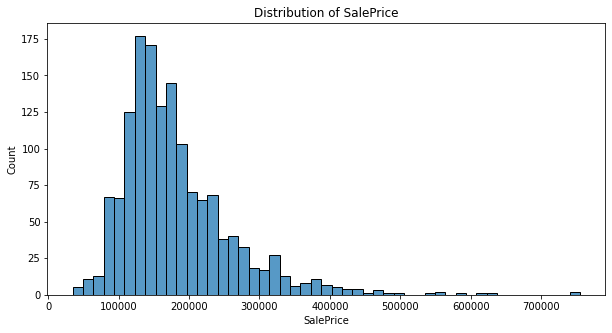

In [6]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title("Distribution of SalePrice")
sns.histplot(df["SalePrice"])

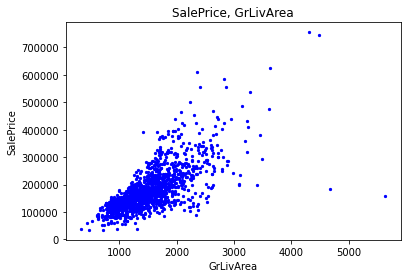

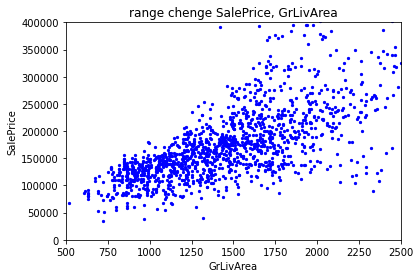

In [7]:
plt.title("SalePrice, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df["GrLivArea"], df["SalePrice"], s=5, c='blue')
plt.show()

# 範囲を変更
plt.title("range chenge SalePrice, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.xlim(500,2500)
plt.ylim(0,400000)
plt.scatter(df["GrLivArea"], df["SalePrice"], s=5, c='blue')
plt.show()

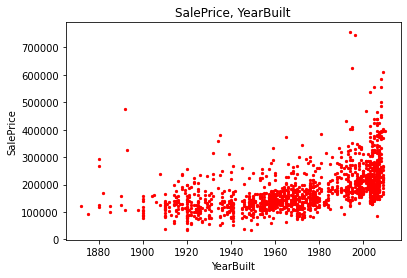

In [8]:
plt.title("SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df["YearBuilt"], df["SalePrice"], s=5, c='red')

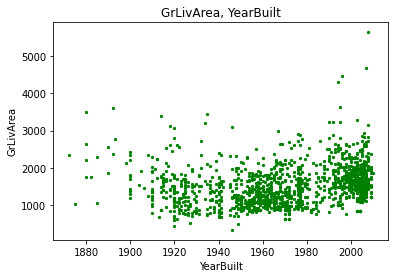

In [9]:
plt.title("GrLivArea, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("GrLivArea")
plt.scatter(df["YearBuilt"], df["GrLivArea"], s=5, c='green')

**前処理・訓練用データと検証用データの分割、標準化**

In [10]:
# DataFrameをndarrayへ変換
X_ndarray = X_df.values 
Y_ndarray = Y_df.values


c
# X_train.shape (1095, 2)
# X_test.shape (365, 2)
# y_train.shape (1095, 1)
# y_test.shape (365, 1)


# 標準化 : データの平均が0に、分散が1となるように変換する操作
# 《注意点》
# 検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけない。
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

# 標準化（訓練用データで.fitを行う）
# fit:パラメータ（平均や標準偏差 etc）計算
# fit_transform:パラメータ計算とデータ変換をまとめて実行
scl.fit(X_train) 

# 標準化（訓練用、検証用双方で.transformを行う）
# transform:データ変換
X_train_transformed = scl.transform(X_train)
X_test_transformed = scl.transform(X_test)

**線形回帰 による学習、推定、評価、可視化**

In [188]:
# 線形回帰モデルの一つ(最小二乗法)。説明変数の値から目的変数の値を予測する。
from sklearn.linear_model import LinearRegression

# モデルに引数を渡してインスタン化する
lgr = LinearRegression()

# 学習する（訓練用データを.fitする）
lgr.fit(X_train_transformed, Y_train)

# # 推定する（検証用データを.predictする）
# Y_train_pred = lgr.predict(X_train_transformed)
Y_test_pred = lgr.predict(X_test_transformed)
# Y_train_pred.shape (1095, 1)
# Y_test_pred.shape (365, 1)
#  Y_test.shape (365, 1)


# 評価のための指標値
from sklearn.metrics import mean_squared_error
print("線形回帰")

# 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的
print("MSE ", mean_squared_error(Y_test, Y_test_pred))

# 二乗平均平方根誤差RMSE: squared=False
print("RMSE ", mean_squared_error(Y_test, Y_test_pred, squared=False))

線形回帰
MSE  1759806008.5516448
RMSE  41950.04181823476


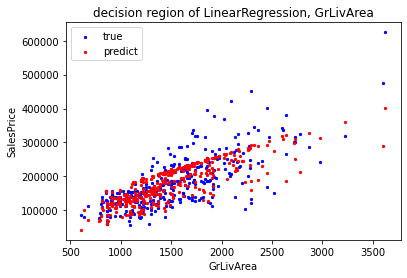

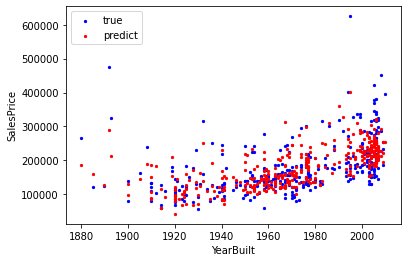

In [189]:
plt.title("decision region of LinearRegression, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 0], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 0], Y_test_pred, s=5, c='red',label='predict')
plt.legend()
plt.show()

# plt.title("decision region of LinearRegression, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 1], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 1], Y_test_pred, s=5, c='red',label='predict')
plt.legend()
plt.show()

**【問題3】手法の比較**

In [152]:
import warnings #ワーニング関連のモジュール？
warnings.filterwarnings('ignore') #ワーニングが消える？

In [18]:
#必要なモジュールをインポート
from sklearn.svm import SVR
 
#インスタンスを作成
svm_reg = SVR()
 
#データを学習
svm_reg.fit(X_train_transformed, Y_train.ravel())

#予測
Y_pred_svm_reg = svm_reg.predict(X_test_transformed)


from sklearn.metrics import mean_squared_error
from sklearn import metrics 

# 評価のための指標値
print("SVR")

# 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的
print("MSE ", mean_squared_error(Y_test, Y_pred_svm_reg))

# 二乗平均平方根誤差RMSE: squared=False
print("RMSE ", mean_squared_error(Y_test, Y_pred_svm_reg, squared=False))

SVR
MSE  6888130349.836837
RMSE  82994.76097824992


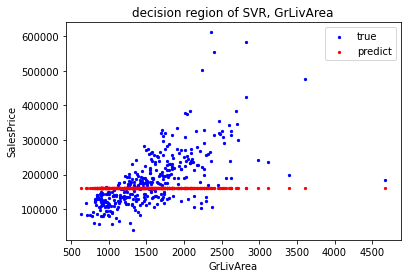

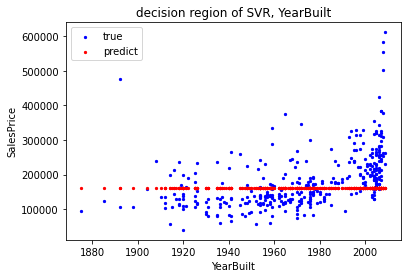

In [17]:
plt.title("decision region of SVR, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 0], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 0], Y_pred_svm_reg, s=5, c='red',label='predict')
plt.legend()
plt.show()

plt.title("decision region of SVR, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 1], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 1], Y_pred_svm_reg, s=5, c='red',label='predict')
plt.legend()
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

#インスタンスを作成
regressor = DecisionTreeRegressor()
 
#データを学習
regressor.fit(X_train_transformed, Y_train)

#L予測
Y_pred_regressor = regressor.predict(X_test_transformed)


from sklearn.metrics import mean_squared_error
from sklearn import metrics 

# 評価のための指標値
print("決定木")

# 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的
print("MSE ", mean_squared_error(Y_test, Y_pred_regressor))

# 二乗平均平方根誤差RMSE: squared=False
print("RMSE ", mean_squared_error(Y_test, Y_pred_regressor, squared=False))

決定木
MSE  3872367983.4532723
RMSE  62228.35353320279


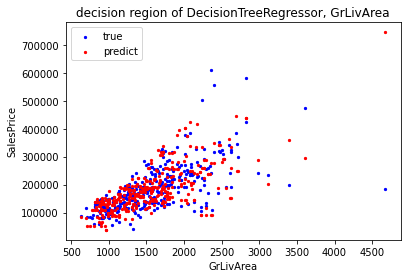

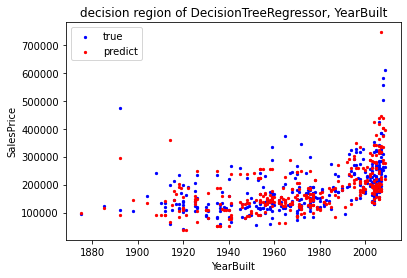

In [20]:
plt.title("decision region of DecisionTreeRegressor, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 0], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 0], Y_pred_regressor, s=5, c='red',label='predict')
plt.legend()
plt.show()

plt.title("decision region of DecisionTreeRegressor, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 1], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 1], Y_pred_regressor, s=5, c='red',label='predict')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

#インスタンスを作成
regr = RandomForestRegressor()
 
#データを学習
regr= regr.fit(X_train_transformed, Y_train.ravel())

#L予測
Y_pred_regr = regr.predict(X_test_transformed)


from sklearn.metrics import mean_squared_error
from sklearn import metrics 

# 評価のための指標値
print("ランダムフォレスト")

# 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的
print("MSE ", mean_squared_error(Y_test, Y_pred_regr))

# 二乗平均平方根誤差RMSE: squared=False
print("RMSE ", mean_squared_error(Y_test, Y_pred_regr, squared=False))

ランダムフォレスト
MSE  2282615604.9680986
RMSE  47776.72660373562


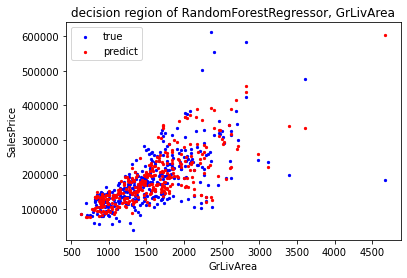

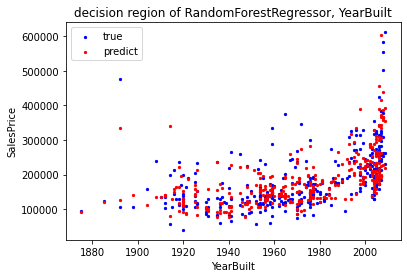

In [23]:
plt.title("decision region of RandomForestRegressor, GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 0], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 0], Y_pred_regr, s=5, c='red',label='predict')
plt.legend()
plt.show()

plt.title("decision region of RandomForestRegressor, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalesPrice")
plt.scatter(X_test[: , 1], Y_test, s=5, c='blue', label='true')
plt.scatter(X_test[: , 1], Y_pred_regr, s=5, c='red',label='predict')
plt.legend()
plt.show()

平均二乗誤差線形回帰の値は　　線形回帰 < ランダムフォレスト < 決定木 < SVR　となった。
MSE,EMSEの値は実行毎に変わるのでこの大小が変わる可能性もある。
SVRの手法での散布図において、予測値が直線上に重なる傾向が見れた。目的変数が連続値でないために起こっていることなのかもしれない。他の手法ではそのような分布にはならなかった。


線形回帰<br>
MSE  1759806008.5516448<br> 
RMSE  41950.04181823476<br>

SVR<br>
MSE  6888130349.836837<br>
RMSE  82994.76097824992<br>

決定木<br>
MSE  3872367983.4532723<br>
RMSE  62228.35353320279<br>

ランダムフォレスト<br>
MSE  2282615604.9680986<br>
RMSE  47776.72660373562<br>